
# **Watershed Algorithm para segmentação de imagens baseada em marcadores**

#### **iremos aprender:**
1. Como utilizar o Watershed Algoritmo para segmentação de imagens


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

!wget https://docs.opencv.org/3.4/water_coins.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


# **Watershed Algorthim Theory**

Qualquer imagem em escala de cinza pode ser vista como uma superfície topográfica onde alta intensidade denota picos e colinas, enquanto baixa intensidade denota vales.

Este algoritmo usa essa analogia e começa a preencher esses pontos baixos (vales) com um rótulo de cor diferente (também conhecido como nossa água).

À medida que a água sobe, dependendo dos picos (gradientes) próximos, a água de diferentes vales, obviamente com cores diferentes, começará a se fundir. Para evitar isso, você constrói barreiras nos locais onde a água se funde. Você continua o trabalho de encher a água e construir barreiras até que todos os picos estejam submersos.

As barreiras que você criou fornecem o resultado da segmentação. Esta é a “filosofia” por trás da bacia hidrográfica. Você pode visitar a [página do CMM](http://cmm.ensmp.fr/~beucher/wtshed.html) sobre bacia hidrográfica para entendê-la com a ajuda de algumas animações.

Sua abordagem, entretanto, fornece resultados supersegmentados devido a ruído ou quaisquer outras irregularidades na imagem.

Assim, OpenCV implementou um algoritmo baseado em marcador onde você especifica quais pontos de vale devem ser mesclados e quais não são. Dá rótulos diferentes para o nosso objeto que conhecemos. Rotule a região que temos certeza de ser o primeiro plano ou objeto com uma cor (ou intensidade),
rotule a região que temos certeza de ser fundo ou não objeto com outra cor e finalmente a região que não temos certeza de nada, rotule-a com 0. Esse é o nosso marcador. Em seguida, aplique o algoritmo. Então nosso marcador será atualizado com os rótulos que demos, e os limites dos objetos terão o valor -1.


SENSÍVEL AO RUÍDO!


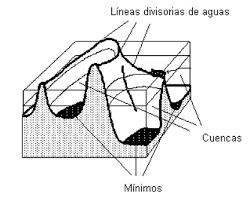

- Conversão da imagem: Geralmente, o Watershed trabalha com uma imagem de gradiente, que realça as bordas. Isso ajuda a identificar melhor os limites entre os objetos.

- Marcação de regiões: São identificados marcadores (seeds) que representam áreas seguras, como os centros das regiões de interesse. Essas marcas podem ser definidas manualmente ou automaticamente.

- Crescimento das regiões: A partir dos marcadores, o algoritmo "inunda" as regiões vizinhas, preenchendo os pixels adjacentes com base na similaridade (geralmente a intensidade dos pixels).

- Formação das linhas de crista: Quando duas regiões em crescimento se encontram, uma linha de crista é formada, delimitando as bordas entre as regiões.

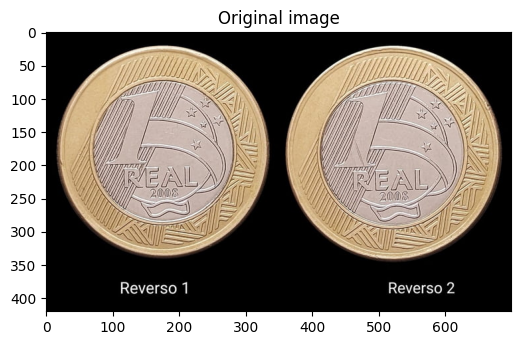

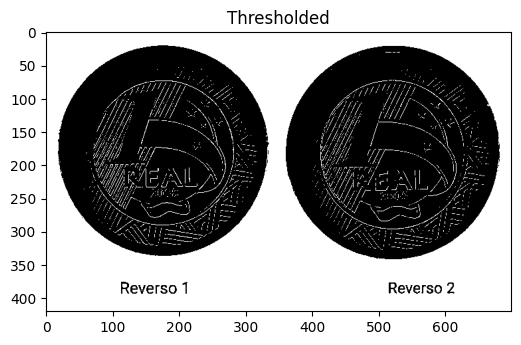

In [2]:
# Load image
img = cv2.imread('images/moedas2.jpg')
imshow("Original image", img)

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold using OTSU
ret, thresh = cv2.threshold(gray,0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

imshow("Thresholded", thresh)

## **Removing the touching masks**

cv2.morphologyEx Essas operações são amplamente usadas para manipular formas e estruturas em imagens binárias ou em níveis de cinza, especialmente para tarefas como redução de ruído, preenchimento de buracos e realce de características específicas.

Parâmetros:
    - Imagem cinza ou binária

    - Operation: Operação morfológica

        - cv2.MORPH_ERODE: Erosão.

        - cv2.MORPH_DILATE: Dilatação.

        - cv2.MORPH_OPEN: Abertura (remoção de ruído).

        - cv2.MORPH_CLOSE: Fechamento (preenchimento de buracos).

        - cv2.MORPH_GRADIENT: Gradiente morfológico.

        - cv2.MORPH_TOPHAT: Top Hat (realce de áreas brilhantes menores que o kernel).

        - cv2.MORPH_BLACKHAT: Black Hat (realce de áreas escuras menores que o kernel).

    - Kernel

    - Numero de interações

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)


cv2.distanceTransform é uma técnica do OpenCV usada para calcular a distância de cada pixel até o pixel mais próximo que não seja zero em uma imagem binária. Essa função é muito útil em tarefas como segmentação de objetos e análise de formas.

Parâmetros: 
- image binária
- distanceType: O tipo de métrica de distância a ser usada. As opções são:
    - cv2.DIST_L1: Distância Manhattan (soma das diferenças absolutas nas direções x e y).
    - cv2.DIST_L2: Distância Euclidiana (distância direta entre dois pontos).
    - cv2.DIST_C: Distância do tipo Chessboard (baseada no número de passos necessários em uma grade quadrada, como no xadrez).
- maskSize: tamanho da mascara usada para calcular as distancias. 
    - 3 ou 5 tamanho para o kernel

    Retorno: Uma imagem em níveis de cinza, onde o valor de cada pixel representa a distância calculada.


Como funciona ?
O algoritmo considera a imagem binária como um mapa, onde: 
- Regiões brancas (valor 255) são os objetos de interesse.
- Regiões pretas (valor 0) são o fundo.
- A função calcula a distância de cada pixel branco ao pixel preto mais próximo e retorna um mapa de distâncias.

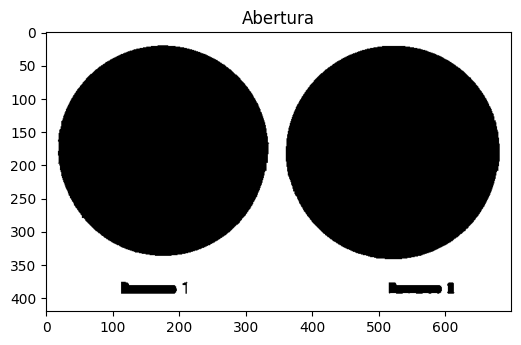

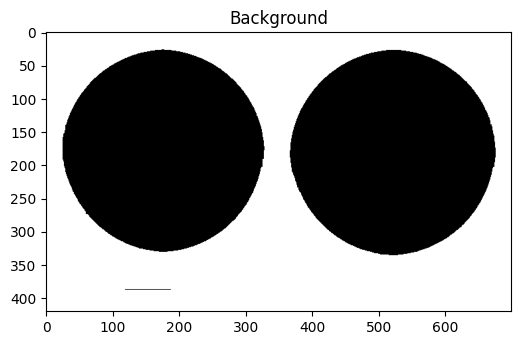

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..136.07904].


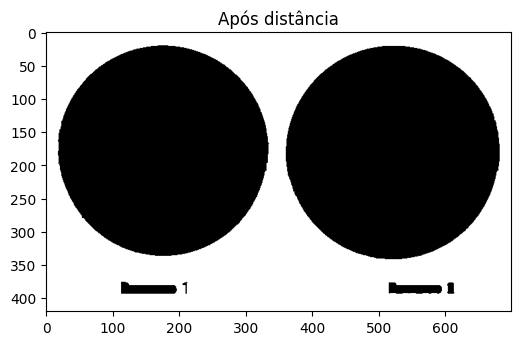

Distância máxima encontrada:  136.07904


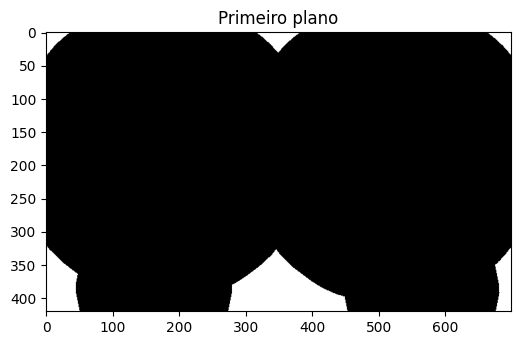

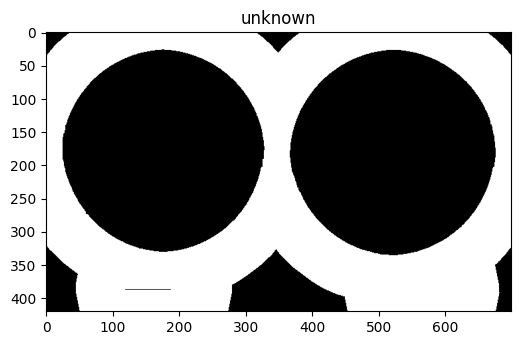

In [3]:
# noise removal
kernel = np.ones((5,5), np.uint8)
# EROSÃO -> DILATAÇÃO
# PARTE INTERNA DA MOEDA, REMOVIDA
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
imshow("Abertura", opening)


# área de fundo certa (Plano mais baixo)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

imshow("Background", sure_bg)

# Encontrando uma área segura em primeiro plano
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
imshow("Após distância", dist_transform)
print("Distância máxima encontrada: ", dist_transform.max())
ret, sure_fg = cv2.threshold(dist_transform,  0.5*dist_transform.max(), 255, 0)

# Encontrando a região desconhecida
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

imshow("Primeiro plano", sure_fg)

imshow("unknown", unknown)

cv2.connectedComponents é usada para rotular componentes conectados em uma imagem binária, ou seja, identificar regiões contíguas de pixels com o mesmo valor. É uma ferramenta essencial para análise de imagens, especialmente em tarefas de segmentação e detecção de objetos.

Retorno: 
-  Número total de componentes conectados encontrados, incluindo o fundo (se o fundo for considerado um componente).
- Uma matriz onde cada pixel tem o valor correspondente ao rótulo do componente ao qual pertence.

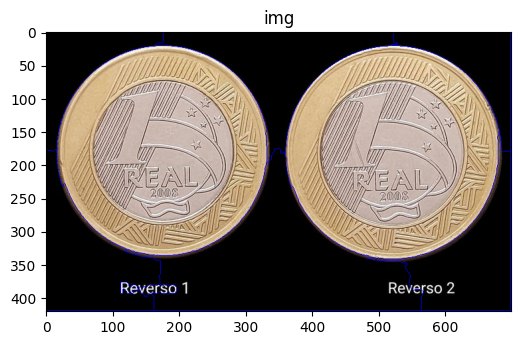

In [59]:
# Rotulação de marcadores
# Componentes conectados determinam a conectividade de regiões semelhantes a blobs em uma imagem binária.
ret, markers = cv2.connectedComponents(sure_fg)

# Adicione um a todos os rótulos para que o plano de fundo não seja 0, mas 1
markers = markers+1

# Marcamos a região desconhecida como 0 (preto)
markers[unknown==255] = 0

#Aplicamos o algoritmo com a imagem original e os marcadores
markers = cv2.watershed(img,markers)
#marcando de azul, o limite dos objetos
img[markers == -1] = [255,0,0]

imshow("img", img)